<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/18_CUSTOMER_CHURN_18_6_YAKUNIY_AMALIY_VAZIFA_Xujakulov_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**
Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  (
    confusion_matrix, classification_report, accuracy_score, precision_score,
    recall_score, f1_score,  roc_curve, auc
)


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


1. **Maʼlumotlarni tahlil qilish va tozalash:**
    - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
    - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

In [50]:
# Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [51]:
#Bo‘sh qiymatlarni tekshirish
print("Bo‘sh qiymatlar soni:\n", df.isnull().sum())

Bo‘sh qiymatlar soni:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [52]:
#Statistik tahlil
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
# Anomaliyalarni aniqlash
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {n_outliers} ta anomaliya")

CustomerId: 0 ta anomaliya
CreditScore: 15 ta anomaliya
Age: 359 ta anomaliya
Tenure: 0 ta anomaliya
Balance: 0 ta anomaliya
NumOfProducts: 60 ta anomaliya
HasCrCard: 0 ta anomaliya
IsActiveMember: 0 ta anomaliya
EstimatedSalary: 0 ta anomaliya
Exited: 2037 ta anomaliya


IQR усулида Аномалия аниқланмади

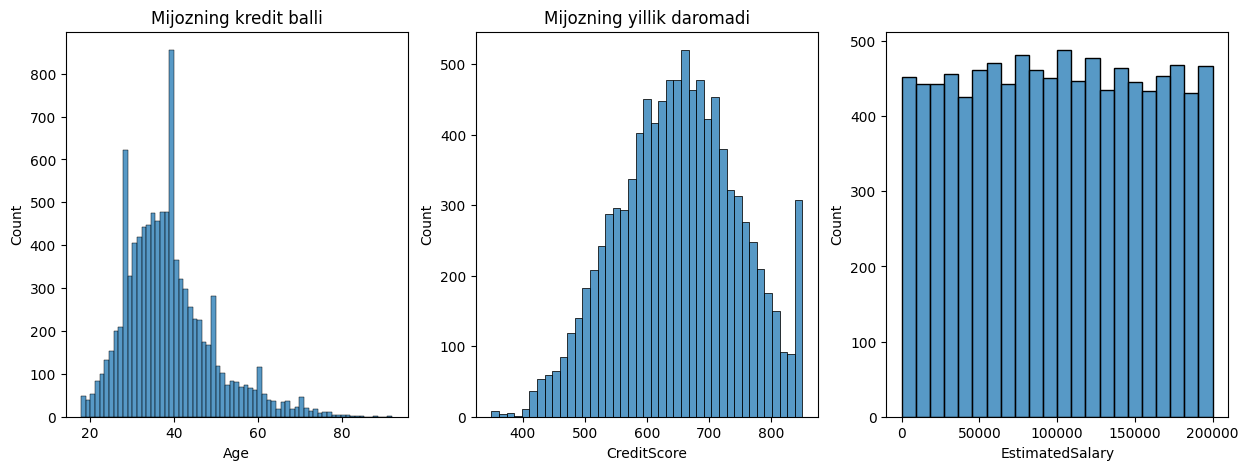

In [54]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Age
sns.histplot(x="Age", data=df, ax=axes[0])
axes[0].set_title("Yoshi")

# CreditScore
sns.histplot(x="CreditScore", data=df, ax=axes[1])
axes[0].set_title("Mijozning kredit balli")

# EstimatedSalary
sns.histplot(x="EstimatedSalary", data=df, ax=axes[2])
axes[1].set_title("Mijozning yillik daromadi")

plt.show()

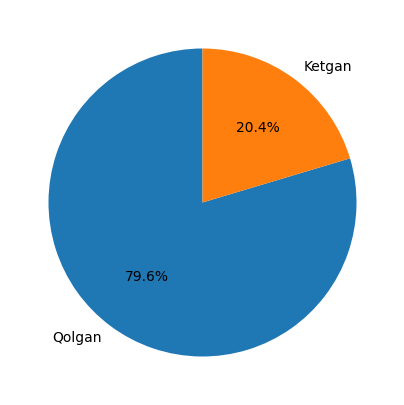

In [55]:
churn_rate = df['Exited'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'],autopct='%1.1f%%', startangle=90)
plt.show()

In [56]:
df.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
4834,15807003,Jennings,762,France,Male,32,10,191775.65,1,1,0,179657.83,0
1851,15587581,Russo,785,Germany,Female,33,5,136624.60,2,1,1,169117.74,0
9376,15641389,Shen,659,Germany,Male,48,4,123593.22,2,1,0,82469.06,1
8961,15657957,Hughes,602,Germany,Female,26,8,113674.20,1,1,0,197861.16,1
9876,15747130,Tsao,521,France,Male,39,7,0.00,2,0,1,653.58,0


In [57]:
df['Geography'].value_counts(normalize=True)*100

,proportion
Geography,
France,50.14
Germany,25.09
Spain,24.77


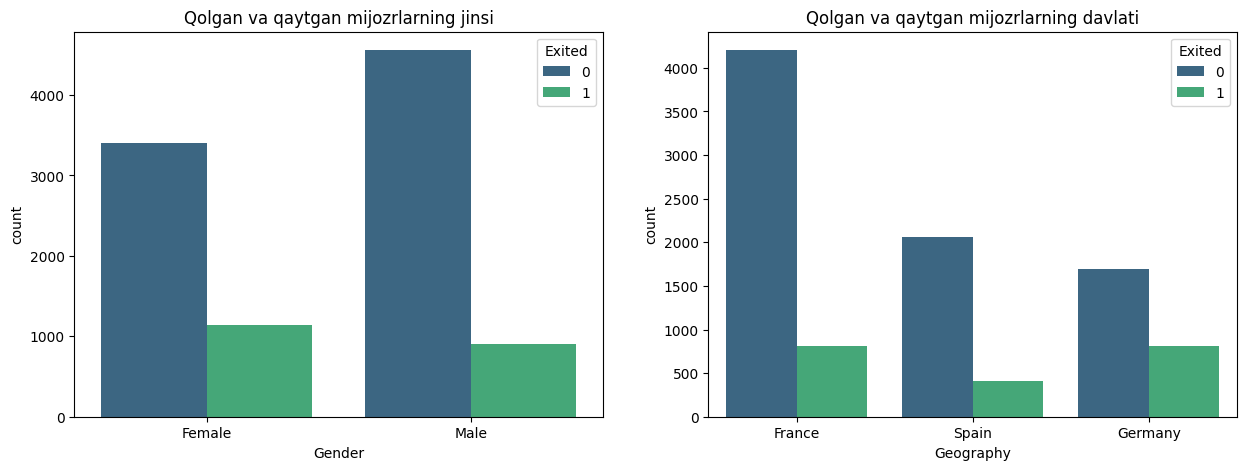

In [58]:
# Kategoriyali ustunlarni tahlil qilamiz

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning davlati")

plt.show()

In [59]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
NumOfProducts,0.047820
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097
HasCrCard,0.007138
CustomerId,0.006248


## **Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).**

In [67]:
df = df.drop('Surname', axis=1)

In [69]:
# Kategorik ustunlar
cat_cols = ["Geography", "Gender"]

# One-hot encoding
encoded = pd.get_dummies(df, columns=cat_cols)

# Natija
encoded.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
4,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


2. **Maʼlumotlarni boʻlish:**
    - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

In [70]:
X = encoded.drop("Exited", axis=1)
y = encoded['Exited']

In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## **ML**
3. **Model qurish:**
    - Quyidagi algoritmlar yordamida modellarni yarating:
        - Logistic Regression
        - Support Vector Machine (SVM)
        - Decision Tree
        - Random Forest
        - XGBoost

##Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.22      0.31       407

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Model aniqligi: 0.8085


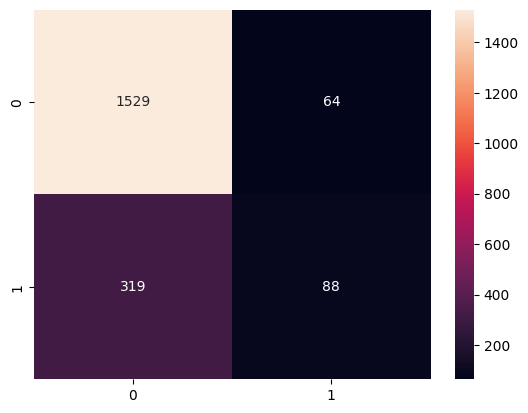

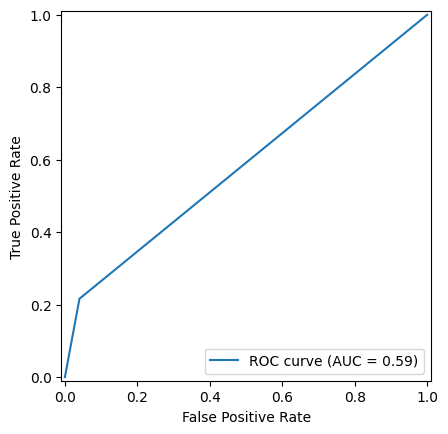

In [73]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

##Support Vector Machines


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.85      0.34      0.49       407

    accuracy                           0.85      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000

Model aniqligi: 0.8535


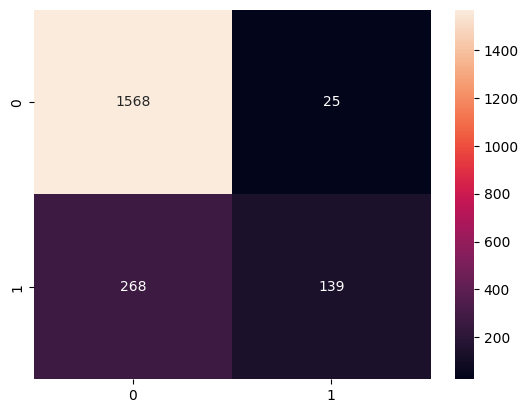

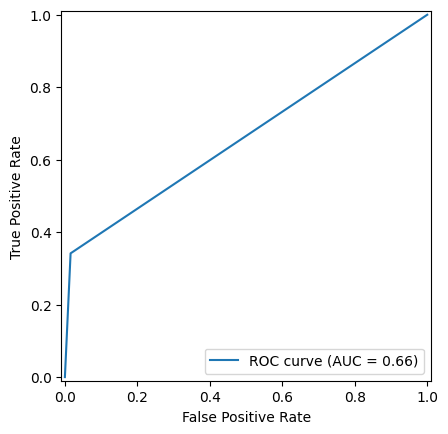

In [74]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

##Decision Tree


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1593
           1       0.47      0.50      0.49       407

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000

Model aniqligi: 0.785


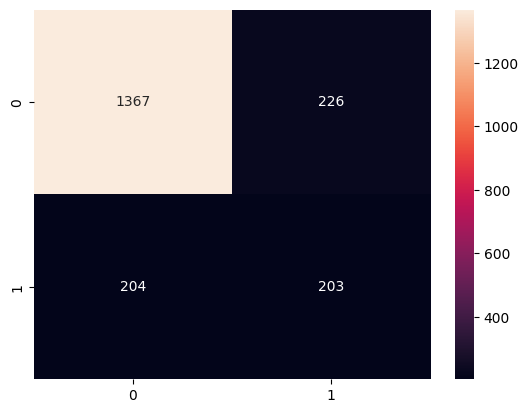

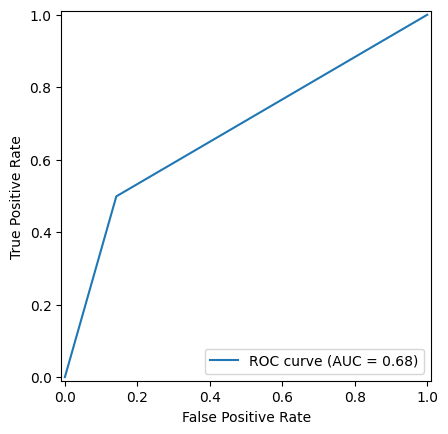

In [75]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

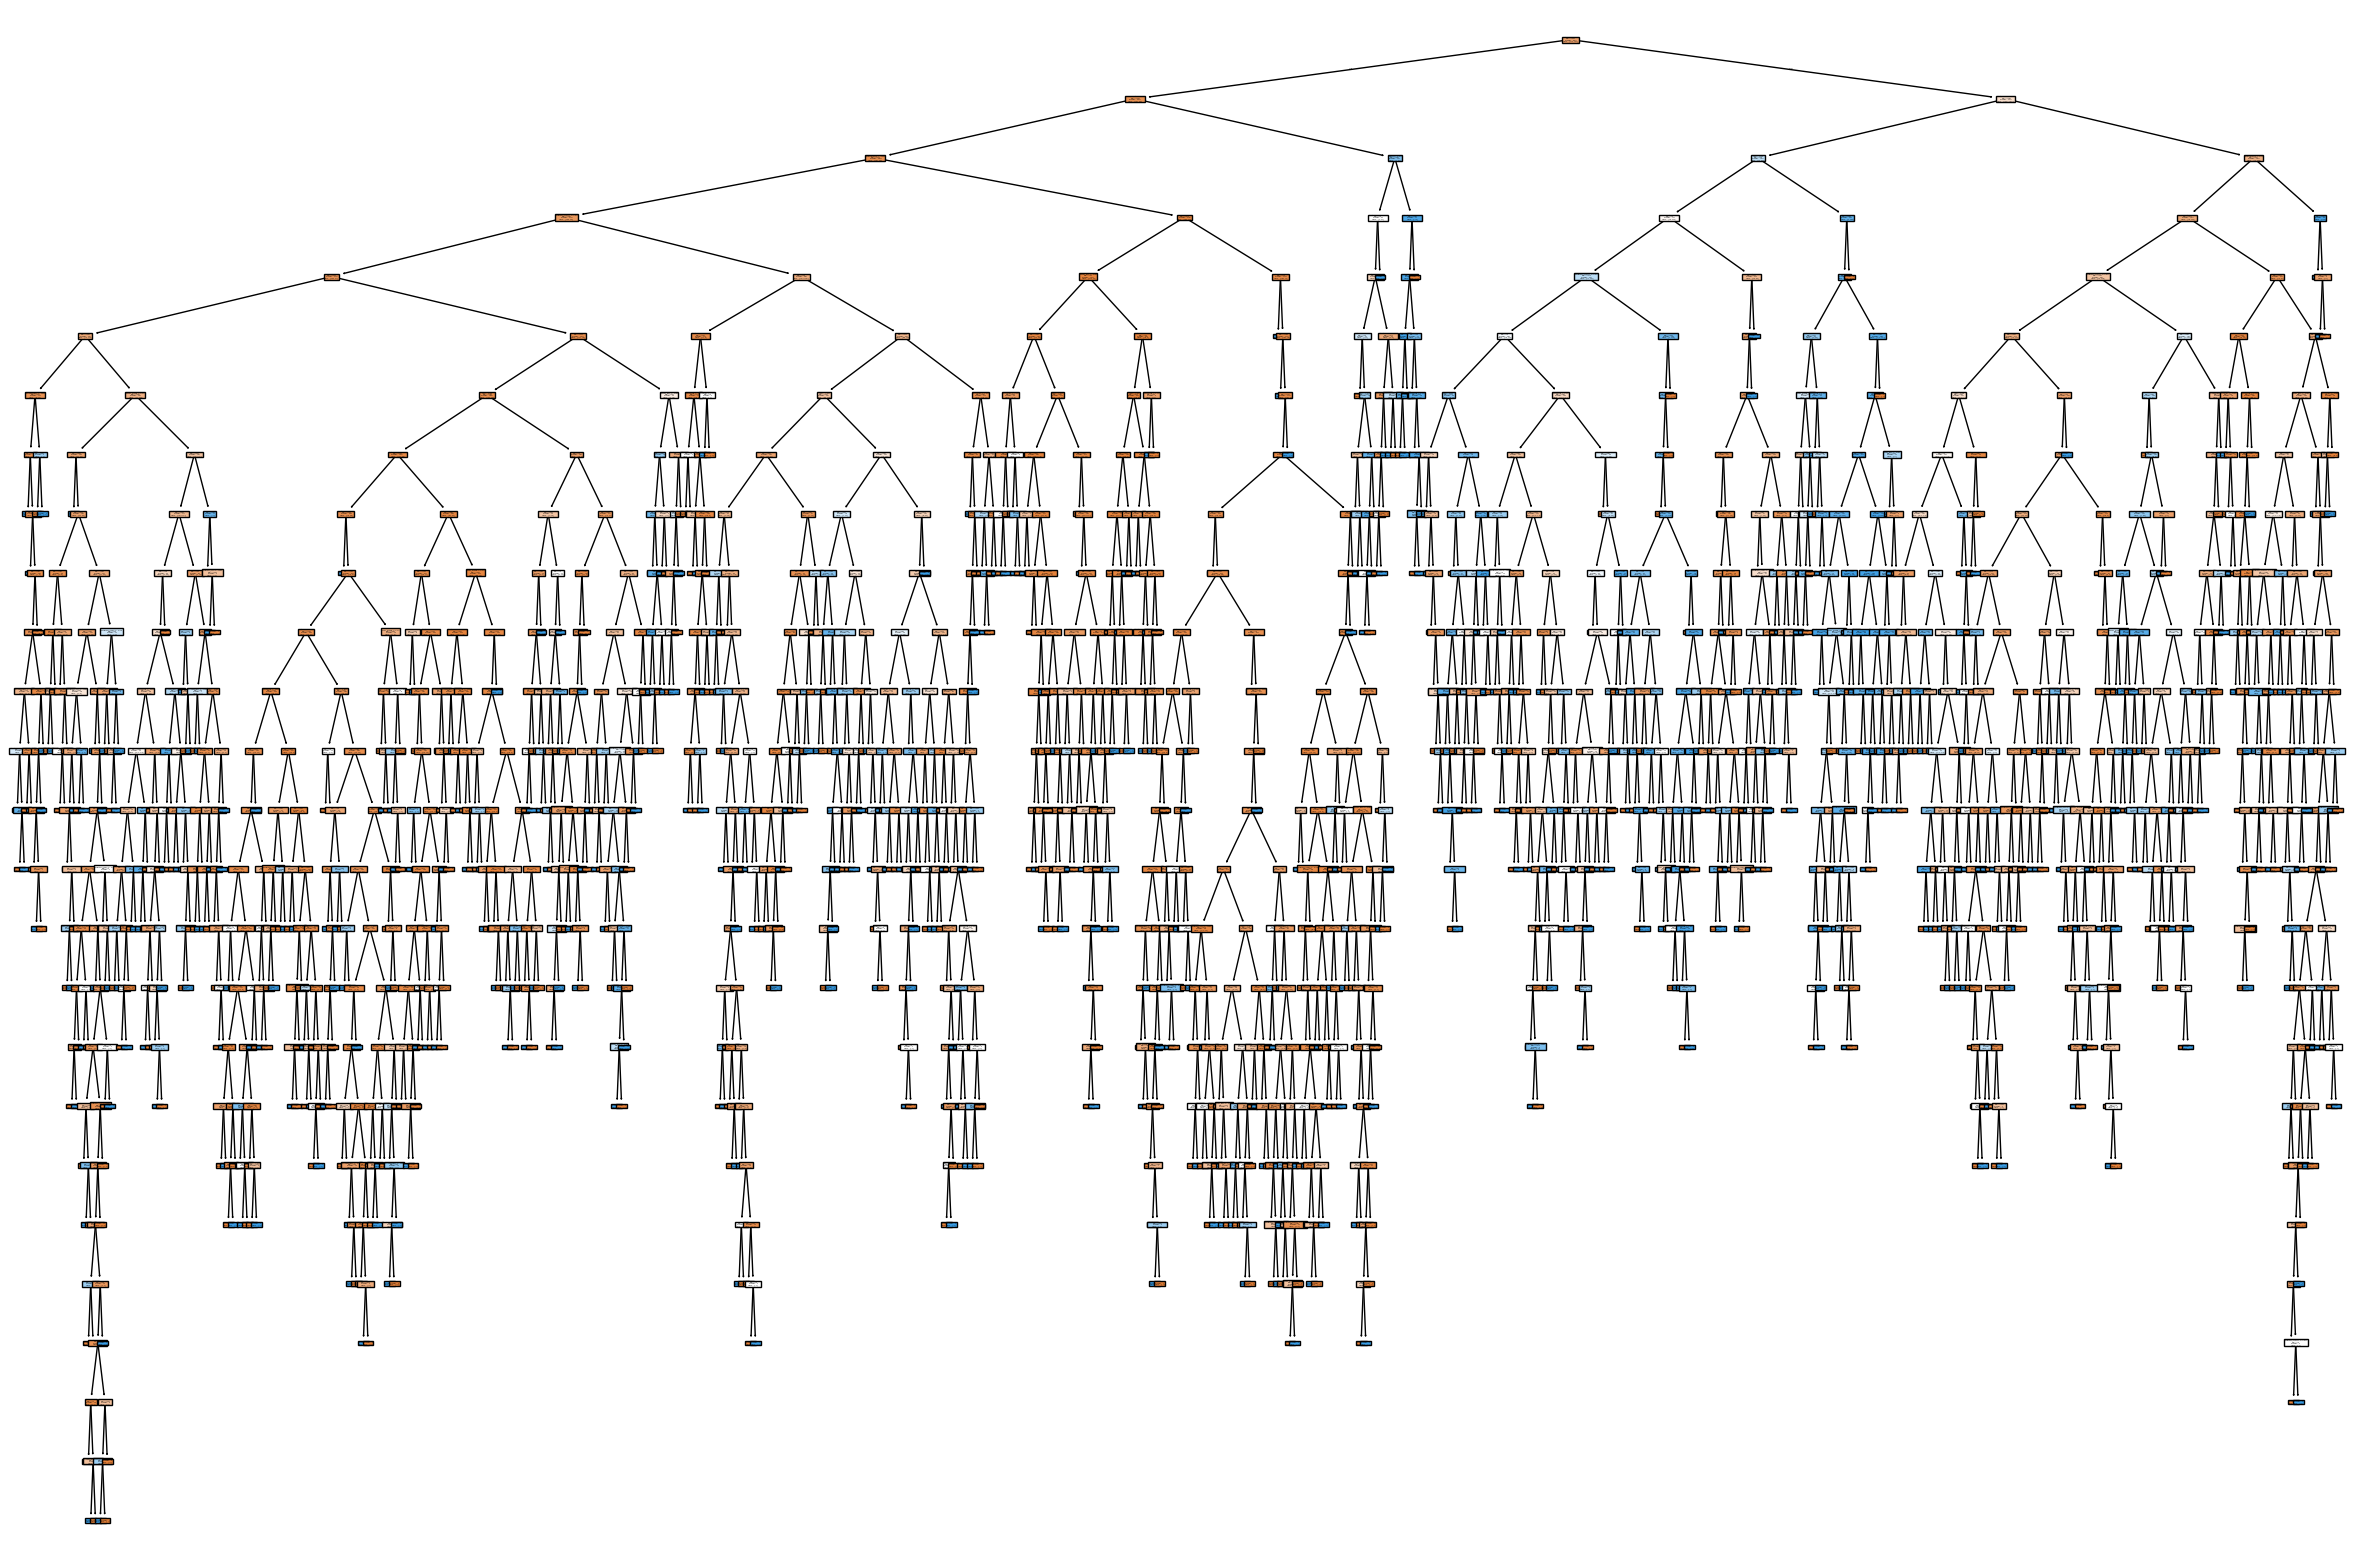

In [77]:
cols = encoded.drop('Exited', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()


##Random Forest


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.72      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Model aniqligi: 0.8535


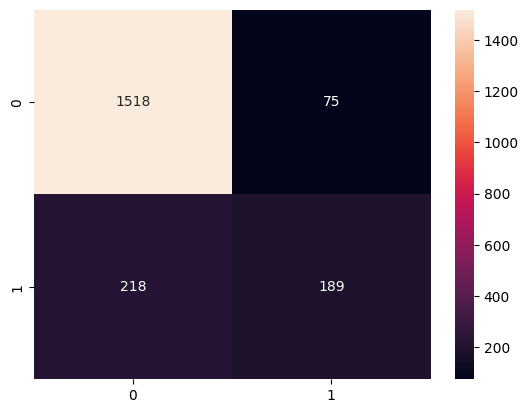

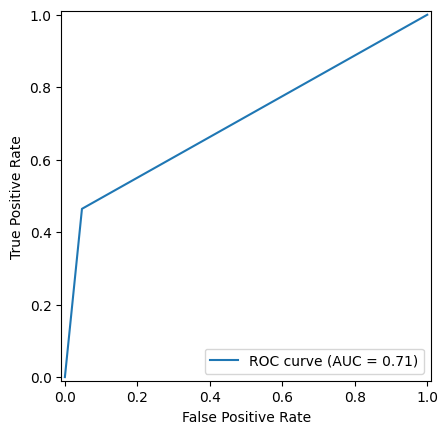

In [78]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


##XGBoost


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Model aniqligi: 0.8525


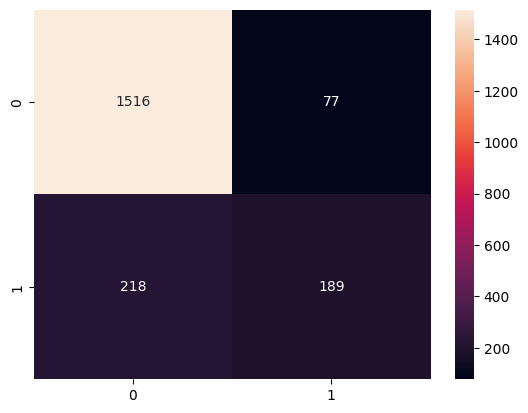

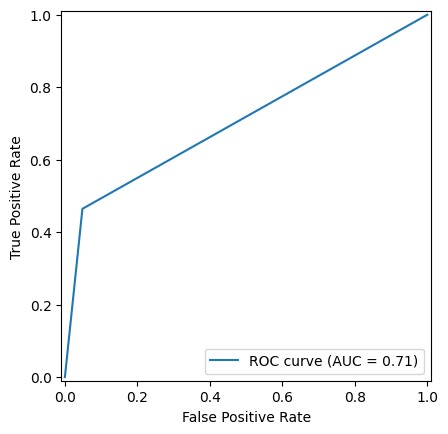

In [79]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Soddaroq usulda

In [97]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "SVM": SVC(probability=True, random_state=42),  # probability=True shart
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42)
}

try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.9, colsample_bytree=0.9, random_state=42,
        eval_metric="logloss", use_label_encoder=False
    )
except:
    pass


================ LogisticRegression ================
Accuracy:  0.8085
Precision: 0.5789
Recall:    0.2162
F1-score:  0.3148


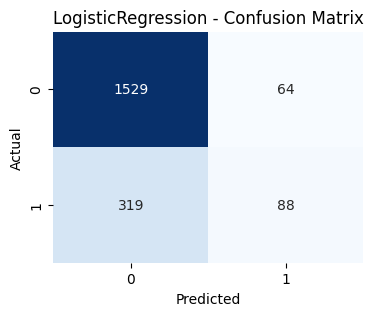

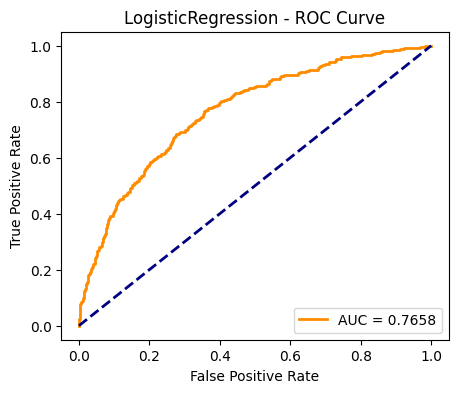


================ SVM ================
Accuracy:  0.8535
Precision: 0.8476
Recall:    0.3415
F1-score:  0.4869


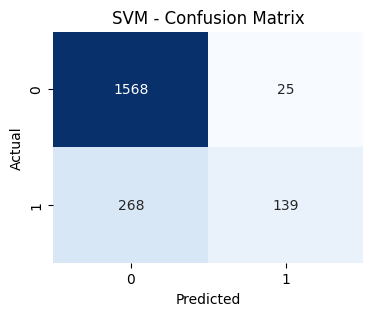

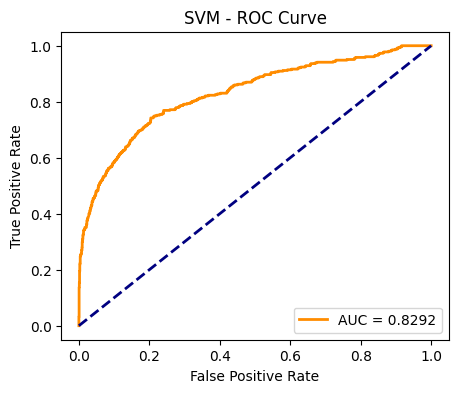


================ DecisionTree ================
Accuracy:  0.7840
Precision: 0.4702
Recall:    0.4840
F1-score:  0.4770


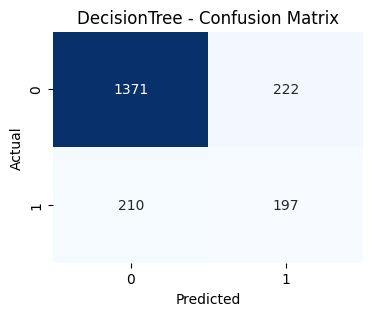

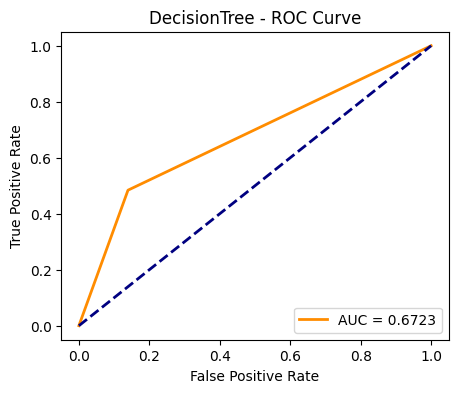


================ RandomForest ================
Accuracy:  0.8610
Precision: 0.7841
Recall:    0.4373
F1-score:  0.5615


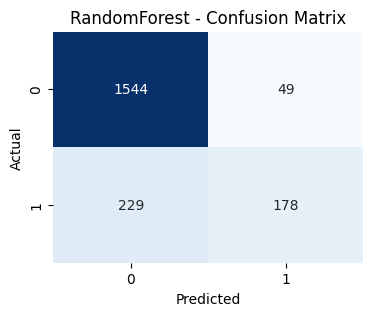

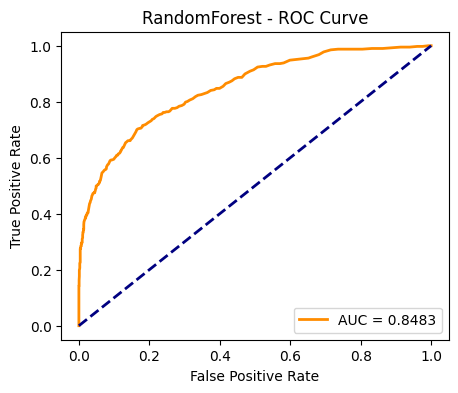


================ XGBoost ================


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:13:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.8560
Precision: 0.7262
Recall:    0.4693
F1-score:  0.5701


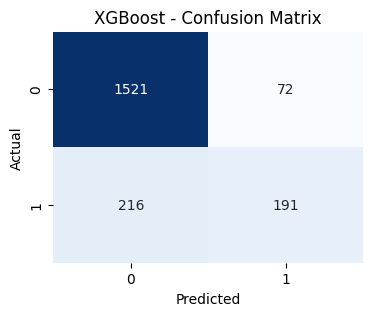

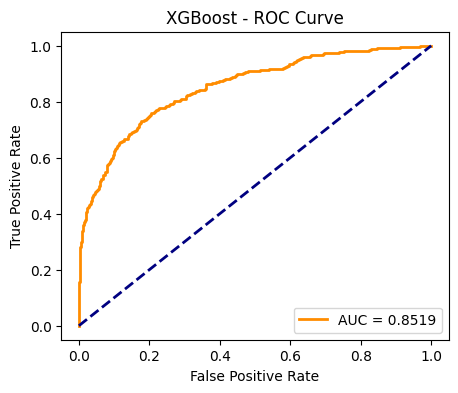

In [98]:
for name, model in models.items():
    print(f"\n================ {name} ================")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Ko‘rsatkichlar
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # --- Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # --- ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        y_dec = model.decision_function(X_test)
        y_prob = MinMaxScaler().fit_transform(y_dec.reshape(-1,1)).ravel()
    else:
        y_prob = y_pred  # fallback

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1],[0,1], color="navy", lw=2, linestyle="--")
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [101]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0)
    })

# DataFrame ko‘rinishida natijalar
df_results = pd.DataFrame(results).round(4)
df_results

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:25:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.8085,0.5789,0.2162,0.3148
1,SVM,0.8535,0.8476,0.3415,0.4869
2,DecisionTree,0.7840,0.4702,0.4840,0.4770
3,RandomForest,0.8610,0.7841,0.4373,0.5615
4,XGBoost,0.8560,0.7262,0.4693,0.5701


##Natijalarni tahlil qilish:

Accuracy бўйича: Random Forest (0.8610) энг юқори.

•	Precision бўйича: SVM (0.8476) энг юқори.

•	Recall бўйича: DecisionTree (0.4840) ва XGBoost (0.4693) яхши.

•	F1-score (баланс) бўйича: XGBoost (0.5701) ва Random Forest (0.5615) энг юқори.

Шунинг учун XGBoost ёки Random Forest — энг яхши модел сифатида танланади. Recall ва F1 муҳим бўлгани учун XGBoost биroz устун.

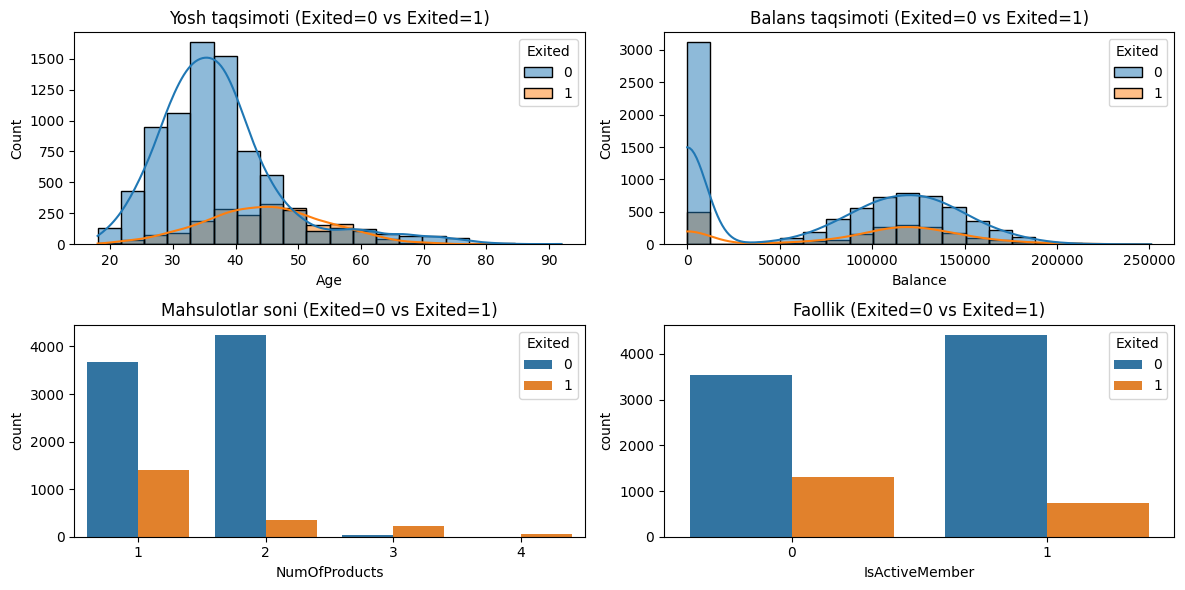

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(12,6))

# Age
sns.histplot(data=df, x="Age", hue="Exited", bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Yosh taqsimoti (Exited=0 vs Exited=1)")

# Balance
sns.histplot(data=df, x="Balance", hue="Exited", bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Balans taqsimoti (Exited=0 vs Exited=1)")

# NumOfProducts
sns.countplot(data=df, x="NumOfProducts", hue="Exited", ax=axes[1,0])
axes[1,0].set_title("Mahsulotlar soni (Exited=0 vs Exited=1)")

# IsActiveMember
sns.countplot(data=df, x="IsActiveMember", hue="Exited", ax=axes[1,1])
axes[1,1].set_title("Faollik (Exited=0 vs Exited=1)")

plt.tight_layout()
plt.show()

Age: кетганлар асосан 40–60 ёш оралиғида.

•	Balance: кетганлар орасида баланс юқори бўлганлар кўп.

•	NumOfProducts: фақат 1 маҳсулот ишлатганлар орасида churn кўп.

•	IsActiveMember: фаол бўлмаганлар кетишга кўпроқ мойил.

## Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.

**Энг катта хавфли гуруҳ: фаол эмас, 1 та хизмат ишлатаётган, 40–60 ёшдаги ва юқори балансга эга мижозлар.
Банк ана шу сегментларга таргет қилиб турли лояллик дастурлари, VIP хизматлар ва кросс-селлинг стратегияларини жорий этиши керак.**
